# Developing a Model to Analyze Rush Game Screenshots

## Environment Setup

In [ ]:
%%capture
%pip install huggingface_hub numpy python-dotenv ultralytics

## Training
Train a model to classify objects within a screenshot of the Rush game type.

In [ ]:
from ultralytics import YOLO
import os

model = YOLO("yolo11m.pt")  # Using YOLOv11n

# Define the dataset path
dataset_path = os.path.expanduser("~/Downloads/project/dataset.yaml")  # Use os.path.expanduser to handle '~'

# Train model
model.train(
    data=dataset_path,  # Updated path to the dataset YAML
    imgsz=640,
    epochs=50,
    batch=16,
    name="yolo_training",
)

## Inference


0: 384x640 3 black-teams, 1 goalie, 1 user-controlled-player, 4 white-teams, 464.6ms
Speed: 3.8ms preprocess, 464.6ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


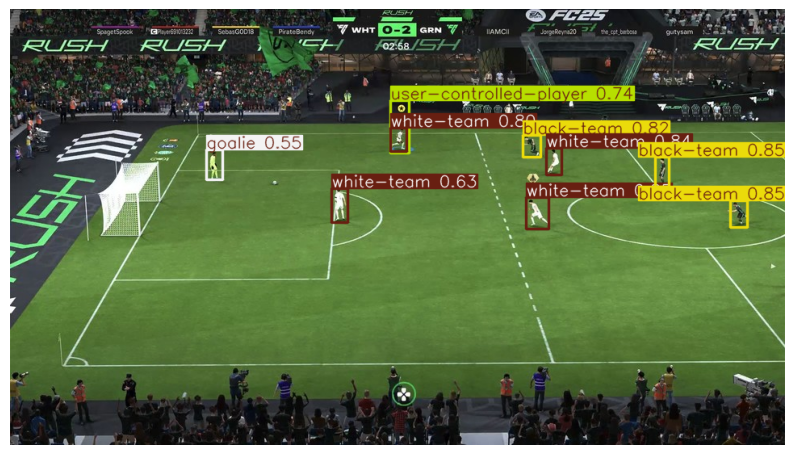


0: 384x640 (no detections), 406.8ms
Speed: 2.3ms preprocess, 406.8ms inference, 0.9ms postprocess per image at shape (1, 3, 384, 640)


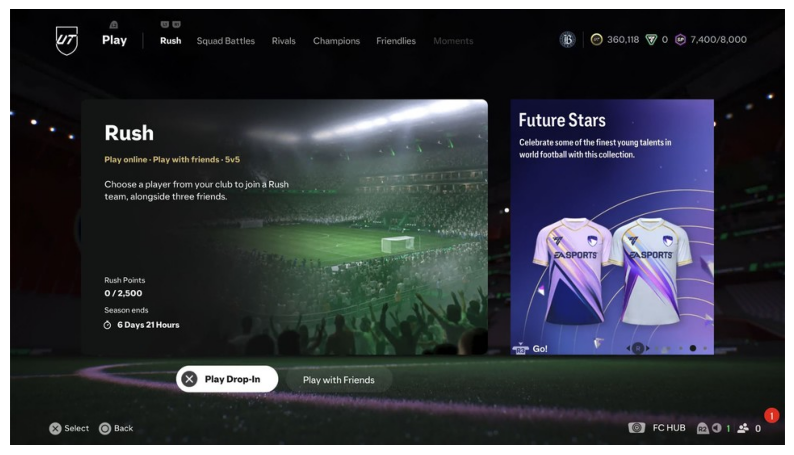


0: 384x640 (no detections), 347.1ms
Speed: 2.7ms preprocess, 347.1ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


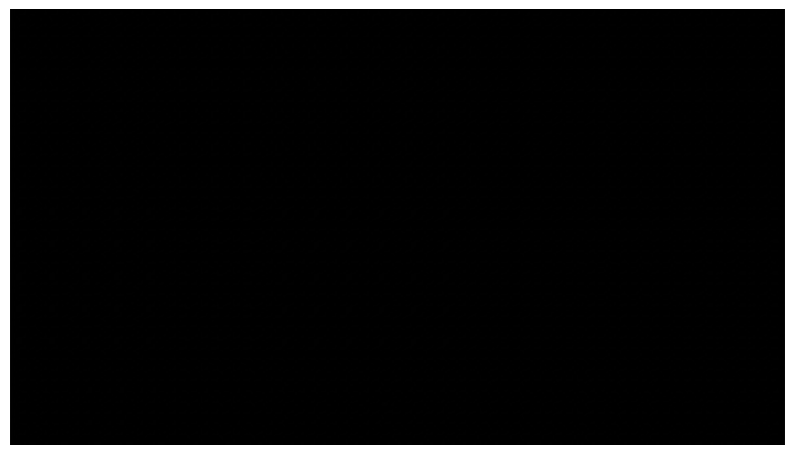


0: 384x640 4 black-teams, 4 white-teams, 455.4ms
Speed: 2.4ms preprocess, 455.4ms inference, 1.0ms postprocess per image at shape (1, 3, 384, 640)


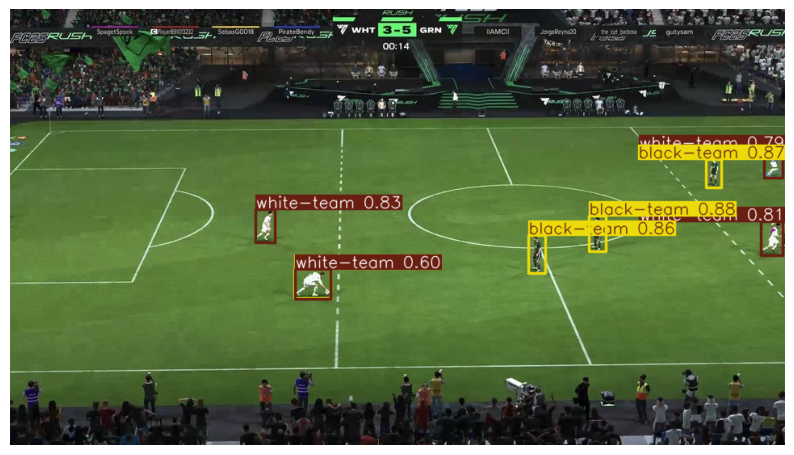


0: 384x640 (no detections), 341.9ms
Speed: 4.9ms preprocess, 341.9ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


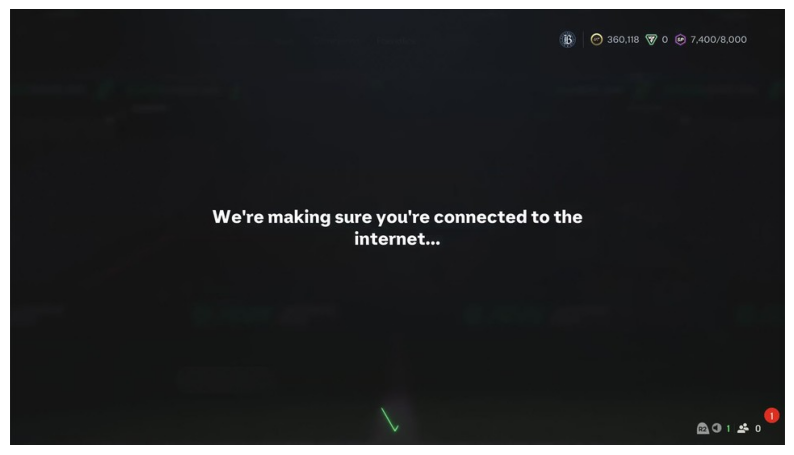


0: 384x640 4 black-teams, 1 goalie, 1 user-controlled-player, 4 white-teams, 379.8ms
Speed: 3.1ms preprocess, 379.8ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


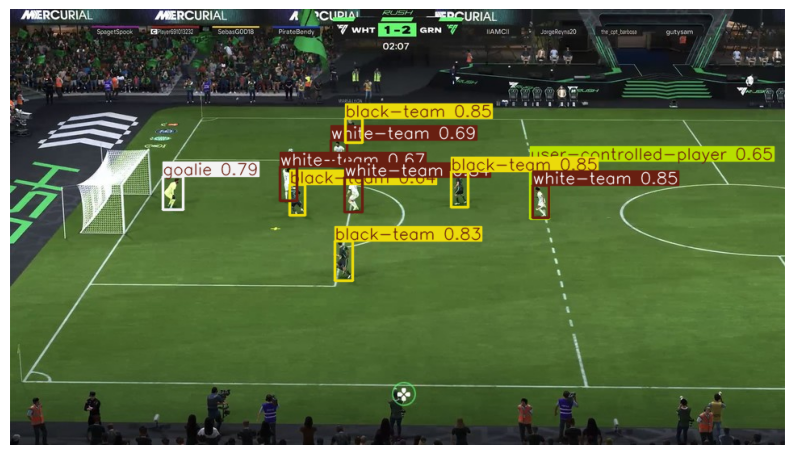


0: 384x640 4 black-teams, 1 goalie, 1 user-controlled-player, 4 white-teams, 486.7ms
Speed: 2.0ms preprocess, 486.7ms inference, 1.1ms postprocess per image at shape (1, 3, 384, 640)


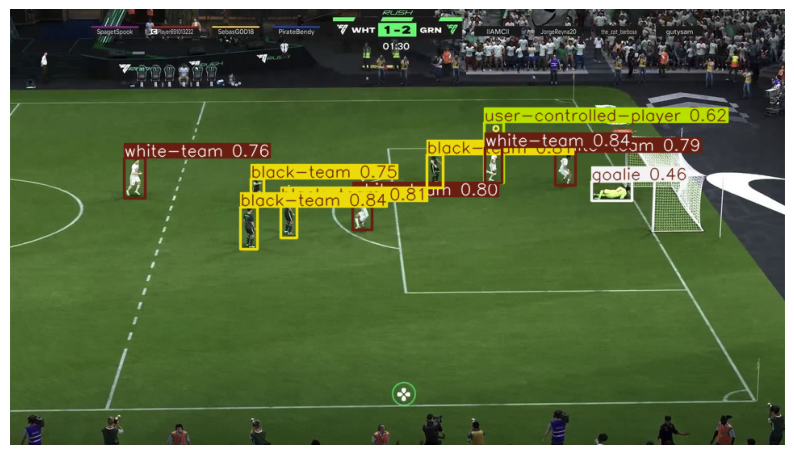


0: 384x640 (no detections), 399.8ms
Speed: 2.0ms preprocess, 399.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


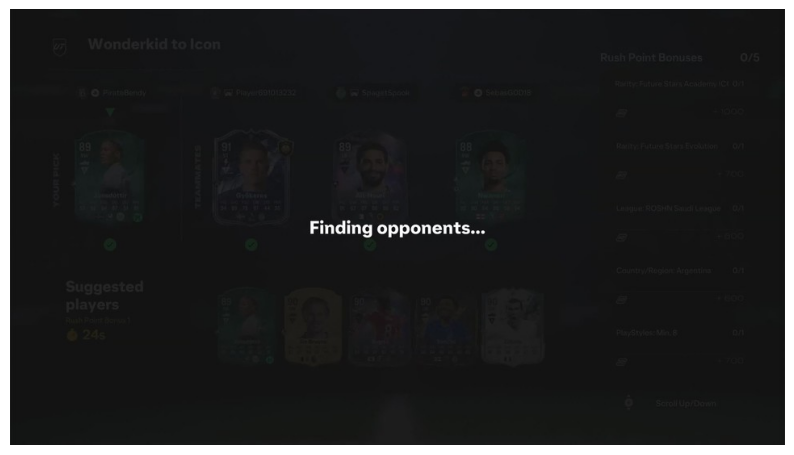


0: 384x640 (no detections), 473.5ms
Speed: 2.6ms preprocess, 473.5ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)


In [ ]:
import os
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

# Load the trained YOLO model
model_path = os.path.expanduser("~/Documents/Rush/mk3.pt")
model = YOLO(model_path)  # Replace with the correct path to your best weights file.

# Define the path to the images for inference
image_dir = os.path.expanduser("../screenshots/jpg/cropped")

# List all image files in the directory
image_files = [f for f in os.listdir(image_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

# Function to perform inference and display results
def run_inference(image_path):
    # Load image using OpenCV
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    
    # Perform inference
    results = model(img_rgb, conf=0.1)
    
    # Render results on the image
    annotated_img = results[0].plot()  # Annotate the image with results

    # Display the image
    plt.figure(figsize=(10, 10))
    plt.imshow(annotated_img)
    plt.axis("off")
    plt.show()

# Run inference for each image in the directory
for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    run_inference(image_path)